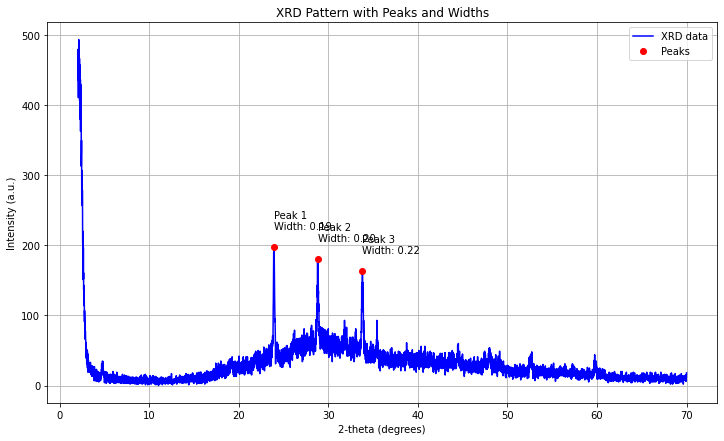

Peak positions (in 2-theta degrees): [23.93758 28.79222 33.79856]
Peak intensities: [198 181 164]
Peak widths (in 2-theta degrees): [0.19326337 0.19599076 0.2174295 ]


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# 1. XRD data
data = pd.read_csv('datag2.csv')
theta = data.iloc[:, 0].values
intensity = data.iloc[:, 1].values


# 2. Lets find peaks
prominence_threshold = 100
peaks, properties = find_peaks(intensity, prominence=prominence_threshold, width=10)

# 3. Extracting peak characteristics
peak_positions = theta[peaks]
peak_intensities = intensity[peaks]
peak_widths = properties["widths"] * (theta[1] - theta[0])  # Convert index width to 2-theta width

# 4. Plotting 
plt.figure(figsize=(12, 7))
plt.plot(theta, intensity, label="XRD data", color="blue")
plt.plot(peak_positions, peak_intensities, "ro", label="Peaks")
for i, (pos, width) in enumerate(zip(peak_positions, peak_widths)):
    plt.annotate(f"Peak {i+1}\nWidth: {width:.2f}", (pos, peak_intensities[i] + 0.05 * max(intensity)))
plt.xlabel("2-theta (degrees)")
plt.ylabel("Intensity (a.u.)")
plt.title("XRD Pattern with Peaks and Widths")
plt.legend()
plt.grid(True)
plt.show()

# 5. results
print("Peak positions (in 2-theta degrees):", peak_positions)
print("Peak intensities:", peak_intensities)
print("Peak widths (in 2-theta degrees):", peak_widths)



In [4]:
output_filename = "xrd_plot.png"
plt.tight_layout()
plt.savefig(output_filename, dpi=100)  
print(f"Plot saved as {output_filename}")

Plot saved as xrd_plot.png


<Figure size 432x288 with 0 Axes>